<a href="https://colab.research.google.com/github/ChairaWandau/3DML_OpenCV_HomeWorks/blob/main/OpenCV/OpenCV_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: работа с цветовым пространством HSV.
На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

Задание 2: На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

In [13]:
import sys
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Клонируем репозиторий с картинкой
!git clone https://github.com/ChairaWandau/3DML_OpenCV_HomeWorks.git

Cloning into '3DML_OpenCV_HomeWorks'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.33 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (3/3), done.


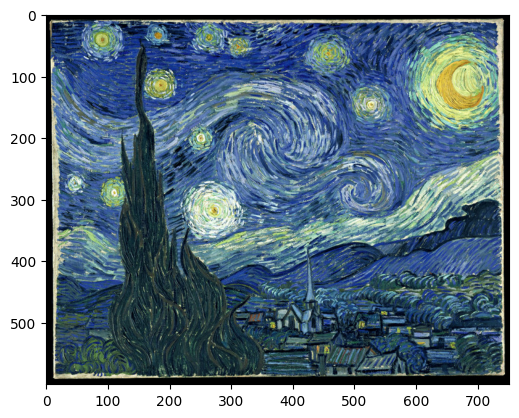

In [ ]:
img = cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/starry_night.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Задание 1: работа с цветовым пространством HSV. На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость. Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

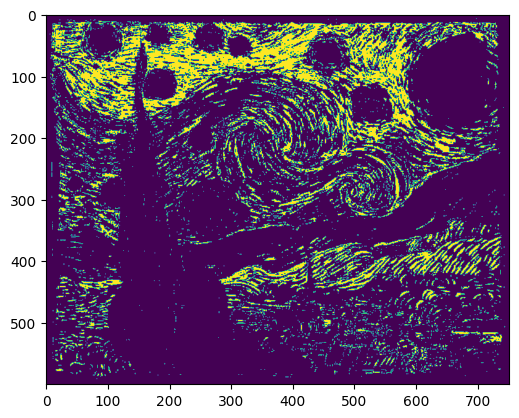

In [ ]:
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)
# создать маску по темно-синим цветам и заменить их на светло-желтые
lower_blue = np.array([110,30,30])
upper_blue = np.array([130,255,255])
mask = cv.inRange(img_hsv, lower_blue, upper_blue)
plt.imshow(mask)

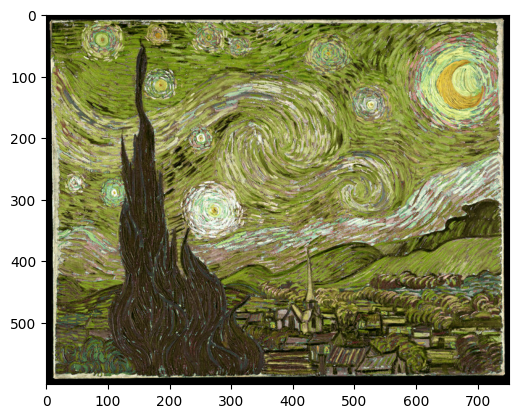

In [ ]:
# сдвинуть диапазон цветов
yellow = 0
blue = 180

diff_color = blue - yellow

hnew = np.mod(h + diff_color, 180)

hsv_new = cv.merge([hnew,s,v])
result = cv.cvtColor(hsv_new, cv.COLOR_HSV2RGB)
plt.imshow(result)

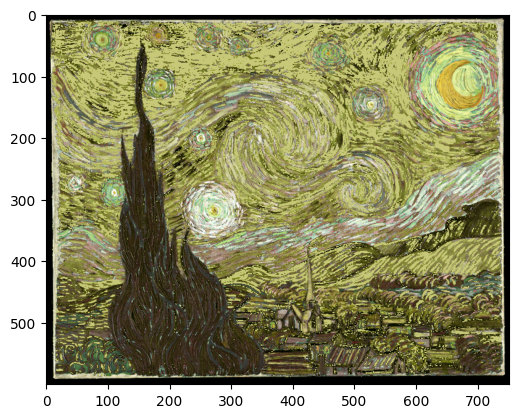

In [ ]:
#высветлить темные участки
snew = s.copy()
vnew = v.copy()
img_hsv_new = result.copy()
hnew[mask==255] = 30
snew[mask==255] = 100
vnew[mask==255] = 200
hsv_new = cv.merge([hnew,snew,vnew])
img_hsv_new = cv.cvtColor(hsv_new, cv.COLOR_HSV2RGB)
plt.imshow(img_hsv_new)

Задание 2: На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

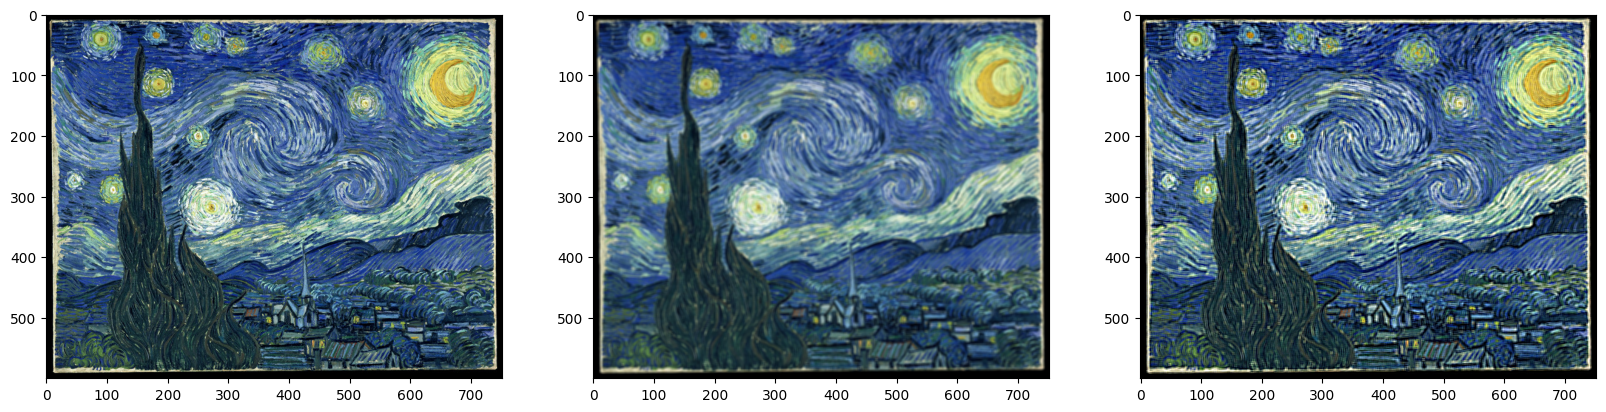

In [37]:
# размываем изображение
img_blur = cv.blur(img_rgb, (5, 5))
# фильтр Лапласа
Laplasian = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_restored = cv.filter2D(img_blur, -1, Laplasian)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(img_blur)
plt.subplot(1, 3, 3)
plt.imshow(img_restored)